In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#----------------------------------------------------------------------#
#   Build the system
#----------------------------------------------------------------------#
def hot_start():
    lattice = np.random.random_integers(0,1,(ns,ns))
    lattice[lattice==0] =- 1
 
    return lattice
 
def cold_start():
    lattice = np.ones((ns,ns))
 
    return lattice

In [3]:
#----------------------------------------------------------------------#
#   Periodic boundary conditions 
#----------------------------------------------------------------------#
def bc(i):
    if i > ns-1:
        return 0
    if i < 0:
        return ns-1
    else:
        return i
 
#----------------------------------------------------------------------#
#   Measure magnetization
#----------------------------------------------------------------------#
 
def mag(lattice):
    m = 0.
    for j in range(0,ns):
                for k in range(0,ns):
                    m += lattice[j,k]
    return m/(ns*ns)    

In [4]:
#----------------------------------------------------------------------#
#   Calculate internal energy
#----------------------------------------------------------------------#
def energy(lattice, N, M):
    return -1 * lattice[N,M] * (lattice[bc(N-1), M] \
                               + lattice[bc(N+1), M] \
                               + lattice[N, bc(M-1)] \
                               + lattice[N, bc(M+1)])
 
def sum_nn(lattice, N, M):
    return (lattice[bc(N-1), M] + lattice[bc(N+1), M] + lattice[N, bc(M-1)] + lattice[N, bc(M+1)])

In [6]:
#----------------------------------------------------------------------#
#   The Main monte carlo loop
#----------------------------------------------------------------------#
def update(beta):
    #lattice = hot_start()
 
    for step in enumerate(range(ns*nw)):
        j = np.random.randint(0,ns)
        k = np.random.randint(0,ns)
 
        E = -2. * energy(lattice, N, M)
 
        if E <= 0.:
            lattice[j,k] *= -1
        elif np.exp(-beta*E) > np.random.rand():
            lattice[j,k] *= -1
 
def sweep(lattice, beta):
    acc = 0
    for j in range(0,ns):
            for k in range(0,ns):
                sum_nn = lattice[bc(j-1), k] + lattice[bc(j+1), k] + lattice[j, bc(k-1)] + lattice[j, bc(k+1)]
                new_spin = -lattice[j,k]
                dE =-1*(new_spin-lattice[j,k])*sum_nn
                if dE <= 0.:
                    lattice[j,k] = new_spin
                    acc += 1
                elif np.exp(-beta*dE) > np.random.rand():
                    lattice[j,k] = new_spin
                    acc += 1
    accept = (1.*acc)/(ns*ns)

Size =  25
Initial sweeps =  10
Sweeps =  250
beta =  0.4
Average m: 0.1455104


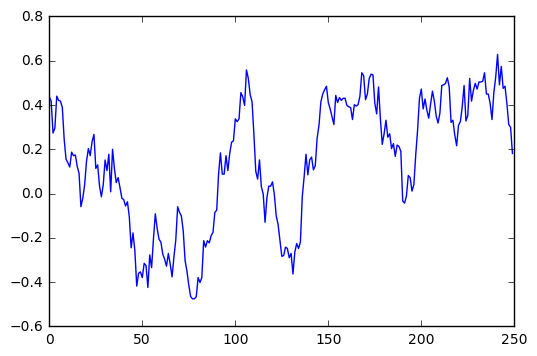

In [7]:
#----------------------------------------------------------------------#
#   Main
#----------------------------------------------------------------------#
 
 
ns = 25
ninit = 10
nsweeps = 250
beta = 0.4
 
print("Size = ", ns)
print("Initial sweeps = ",ninit)
print("Sweeps = ", nsweeps)
print("beta = ", beta)
accept = 0.0
lattice = cold_start()
for n in range(ninit):
    sweep(lattice, beta)
    #update(beta)
    m = mag(lattice)
    #print("Sweep: ",n, "Mag = " ,m)
    
m = mag(lattice)
#print("Mag = " ,m)
mav = 0
mlist = np.ones(nsweeps)

for n in range(nsweeps):
    sweep(lattice, beta)
    #update(beta)
    m = mag(lattice)
    mav += m
    mlist[n]=m
    #print("Sweep: ",n, "Mag = " ,m)
 
mav = mav / nsweeps
print("Average m:", mav)
plt.plot(mlist)
plt.show()